In [531]:
import snscrape.modules.twitter as snstwitter
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
from string import punctuation
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import demoji
from PIL import Image
import re
pd.set_option('display.max_columns',50)

In [220]:
subject="(from:TheEconomist) until:2023-02-03 since:2020-01-01"

In [221]:
tweets=[]
limits=10000

In [222]:
for tweet in snstwitter.TwitterSearchScraper(subject).get_items():
    if len(tweets)==limits:
        break
    else:
        tweets.append([tweet.date,tweet.user,tweet.content])


C:\Users\USER\AppData\Local\Temp/ipykernel_17064/321356835.py:5: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user,tweet.content])


In [223]:
data=pd.DataFrame(tweets,columns=['Date','user','content'])

In [224]:
data

,Date,user,content
0,2023-02-02 23:43:07+00:00,https://twitter.com/TheEconomist,"Our podcast on markets, the economy and busine..."
1,2023-02-02 23:30:31+00:00,https://twitter.com/TheEconomist,President Joe Biden’s complex political compro...
2,2023-02-02 23:11:08+00:00,https://twitter.com/TheEconomist,Americans on low incomes have been somewhat sh...
3,2023-02-02 22:55:41+00:00,https://twitter.com/TheEconomist,The US ambassador has unveiled harsh new sanct...
4,2023-02-02 22:36:49+00:00,https://twitter.com/TheEconomist,What ultimately matters for the companies and ...
...,...,...,...
9995,2022-10-23 19:09:46+00:00,https://twitter.com/TheEconomist,"As America tightens controls on exports, chip ..."
9996,2022-10-23 18:52:06+00:00,https://twitter.com/TheEconomist,The Chinese Communist Party’s congress was a s...
9997,2022-10-23 18:36:49+00:00,https://twitter.com/TheEconomist,The race to No 10 is on (again). Follow the co...
9998,2022-10-23 18:21:44+00:00,https://twitter.com/TheEconomist,"She had hoped a respected, non-party technocra..."


In [225]:
data_tratment=data.copy()
del data_tratment['user']

In [226]:
data_tratment

,Date,content
0,2023-02-02 23:43:07+00:00,"Our podcast on markets, the economy and busine..."
1,2023-02-02 23:30:31+00:00,President Joe Biden’s complex political compro...
2,2023-02-02 23:11:08+00:00,Americans on low incomes have been somewhat sh...
3,2023-02-02 22:55:41+00:00,The US ambassador has unveiled harsh new sanct...
4,2023-02-02 22:36:49+00:00,What ultimately matters for the companies and ...
...,...,...
9995,2022-10-23 19:09:46+00:00,"As America tightens controls on exports, chip ..."
9996,2022-10-23 18:52:06+00:00,The Chinese Communist Party’s congress was a s...
9997,2022-10-23 18:36:49+00:00,The race to No 10 is on (again). Follow the co...
9998,2022-10-23 18:21:44+00:00,"She had hoped a respected, non-party technocra..."


In [227]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data_tratment['content'])

In [228]:
vetorizar.get_feature_names()


['America',
 'But',
 'China',
 'In',
 'It',
 'The',
 'Ukraine',
 'about',
 'an',
 'and',
 'are',
 'as',
 'at',
 'be',
 'been',
 'but',
 'by',
 'co',
 'for',
 'from',
 'has',
 'have',
 'he',
 'his',
 'how',
 'https',
 'in',
 'is',
 'it',
 'its',
 'more',
 'new',
 'not',
 'of',
 'on',
 'one',
 'our',
 'than',
 'that',
 'the',
 'their',
 'they',
 'this',
 'to',
 'up',
 'was',
 'will',
 'with',
 'world',
 'year']

In [229]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names())

In [230]:
matriz_esparsa

,America,But,China,In,It,The,Ukraine,about,an,and,are,as,at,be,been,but,by,co,for,from,has,have,he,his,how,https,in,is,it,its,more,new,not,of,on,one,our,than,that,the,their,they,this,to,up,was,will,with,world,year
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,2,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,3,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
9996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
9998,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [231]:
words_data="".join([x for x in data.content])

In [232]:
token = tokenize.WhitespaceTokenizer()

In [233]:
token_frase = token.tokenize(words_data)
frequency = nltk.FreqDist(token_frase)
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})

In [234]:
df_frequency.sort_values(by='Frequency',ascending=False)


,Word,Frequency
4,the,10687
11,of,6614
71,to,6255
26,a,4920
6,and,4568
...,...,...
19040,wherewithal,1
19039,starving.,1
19038,four-tenths,1
19037,https://t.co/EEIhI20eEBZanu­-PF,1


In [235]:
irrelevant_words = nltk.corpus.stopwords.words("English")

phrase = list()
for twee in data_tratment.content:
    new_phrase = list()
    words_text = token.tokenize(twee)
    for words in words_text:
        if words not in irrelevant_words:
            new_phrase.append(words)
    phrase.append(' '.join(new_phrase))

data_tratment["new_tweet"] = phrase

In [236]:
data_tratment

,Date,content,new_tweet
0,2023-02-02 23:43:07+00:00,"Our podcast on markets, the economy and busine...","Our podcast markets, economy business. This we..."
1,2023-02-02 23:30:31+00:00,President Joe Biden’s complex political compro...,President Joe Biden’s complex political compro...
2,2023-02-02 23:11:08+00:00,Americans on low incomes have been somewhat sh...,Americans low incomes somewhat sheltered curre...
3,2023-02-02 22:55:41+00:00,The US ambassador has unveiled harsh new sanct...,The US ambassador unveiled harsh new sanctions...
4,2023-02-02 22:36:49+00:00,What ultimately matters for the companies and ...,What ultimately matters companies households n...
...,...,...,...
9995,2022-10-23 19:09:46+00:00,"As America tightens controls on exports, chip ...","As America tightens controls exports, chip bos..."
9996,2022-10-23 18:52:06+00:00,The Chinese Communist Party’s congress was a s...,The Chinese Communist Party’s congress showcas...
9997,2022-10-23 18:36:49+00:00,The race to No 10 is on (again). Follow the co...,The race No 10 (again). Follow contest tracker...
9998,2022-10-23 18:21:44+00:00,"She had hoped a respected, non-party technocra...","She hoped respected, non-party technocrat woul..."


Let's get rid of the punctions

In [237]:
token_punctuation = tokenize.WordPunctTokenizer()

In [238]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [239]:
pontuacao_stopwords = pontuacao + irrelevant_words

phrase= list()
for twee in data_tratment["new_tweet"]:
    new_phrase = list()
    words_text = token_punctuation.tokenize(twee)
    for word in words_text:
        if word not in pontuacao_stopwords:
            new_phrase.append(word)
    phrase.append(' '.join(new_phrase))
data_tratment['new_tweet_2']=phrase

In [240]:
data_tratment

,Date,content,new_tweet,new_tweet_2
0,2023-02-02 23:43:07+00:00,"Our podcast on markets, the economy and busine...","Our podcast markets, economy business. This we...",Our podcast markets economy business This week...
1,2023-02-02 23:30:31+00:00,President Joe Biden’s complex political compro...,President Joe Biden’s complex political compro...,President Joe Biden ’ complex political compro...
2,2023-02-02 23:11:08+00:00,Americans on low incomes have been somewhat sh...,Americans low incomes somewhat sheltered curre...,Americans low incomes somewhat sheltered curre...
3,2023-02-02 22:55:41+00:00,The US ambassador has unveiled harsh new sanct...,The US ambassador unveiled harsh new sanctions...,The US ambassador unveiled harsh new sanctions...
4,2023-02-02 22:36:49+00:00,What ultimately matters for the companies and ...,What ultimately matters companies households n...,What ultimately matters companies households n...
...,...,...,...,...
9995,2022-10-23 19:09:46+00:00,"As America tightens controls on exports, chip ...","As America tightens controls exports, chip bos...",As America tightens controls exports chip boss...
9996,2022-10-23 18:52:06+00:00,The Chinese Communist Party’s congress was a s...,The Chinese Communist Party’s congress showcas...,The Chinese Communist Party ’ congress showcas...
9997,2022-10-23 18:36:49+00:00,The race to No 10 is on (again). Follow the co...,The race No 10 (again). Follow contest tracker...,The race No 10 ). Follow contest tracker https...
9998,2022-10-23 18:21:44+00:00,"She had hoped a respected, non-party technocra...","She hoped respected, non-party technocrat woul...",She hoped respected non party technocrat would...


In [241]:
data_tratment['new_tweet_2'][120]

'“ Another frozen conflict preferable never ending war puts Europe Ukraine ultimately world risk years come ,” writes CChivvis part guest series debating peace talks Russia Ukraine https :// co uD8WMvjVPl'

In [242]:
phrases=[]
for i in range(0,8000):
    phrases.append(data_tratment['new_tweet_2'][i])

In [243]:
cleaned_phrases=[]

In [244]:
for x in phrases:
    before,sep,after=x.partition(' https')
    cleaned_phrases.append(before)

In [245]:
cleaned_phrases_noemoji=[]

removing emoji

In [246]:
for i in range(0,8000):
    cleaned_phrases_noemoji.append(demoji.replace(cleaned_phrases[i],''))

In [247]:
cleaned_phrases_noemoji[579]

'A white gay Zulu speaking mayor shaking South African politics'

Unecessary words- before

In [248]:
file = open('tweets_economist_before.txt','w',encoding='utf-8')
for  word in cleaned_phrases_noemoji:
	file.write(word+",")
file.close()

In [249]:
with open('tweets_economist_before.txt',encoding='utf-8') as file:
    words = file.readlines()

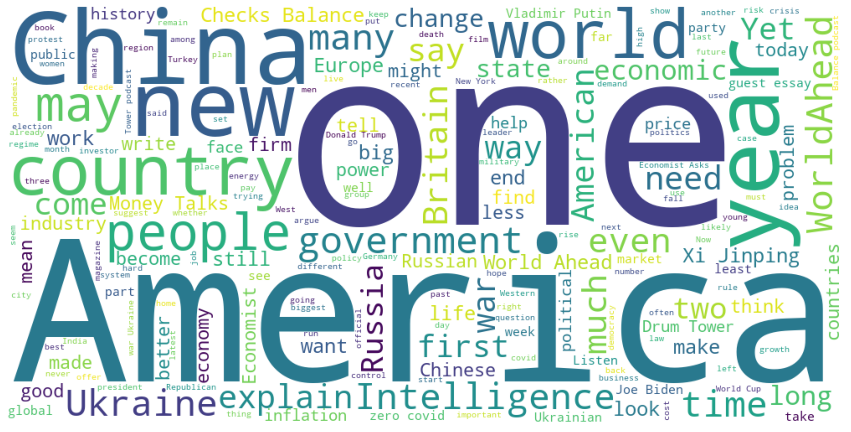

In [250]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500,background_color='White').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud_tweets_before"+".png", bbox_inches='tight')
plt.show()
plt.close()

Unecessary words- after

In [412]:
list_words=['one','new','may','need','Yet','S']

In [413]:
copia=cleaned_phrases_noemoji.copy()

In [414]:
for x in range(0,len(copia)):
    for i in list_words:
        if i in copia[x]:
            copia[x]=copia[x].replace(i,'')

In [415]:
file = open('tweets_economist_after.txt','w',encoding='utf-8')
for  word in copia:
	file.write(word+",")
file.close()

In [416]:
with open('tweets_economist_after.txt',encoding='utf-8') as file:
    words = file.readlines()

In [573]:
mask=np.array(Image.open('tei_gray.png'))
mask

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)

In [575]:
def transform_zeros(val):
    if val == 1:
        return 255
    if val==2:
        return 255
    else:
        return val

In [576]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

In [577]:
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [578]:
maskable_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

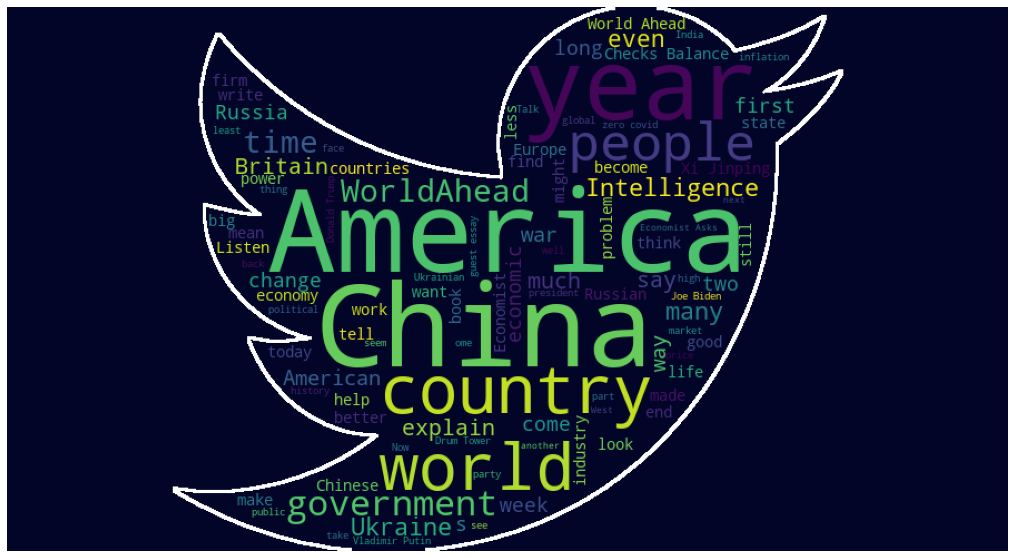

In [592]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500,background_color='#020528',
                      contour_color='white',
                      contour_width=4,
                      min_font_size=3,
                      max_words=100,
                      mask=maskable_image).generate(unique_string)
plt.figure(figsize=(20,20
                    ))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud_tweets_after"+".png", bbox_inches='tight')
plt.show()
plt.close()